In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Get Data

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


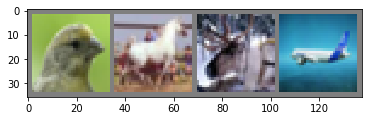

 bird horse  deer plane


In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Neural Network

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [11]:
# Using cross-entropy because we are making a classifier
criterion = nn.CrossEntropyLoss()

# Using Adam optimizer
opt = optim.Adam(net.parameters())

In [16]:
# 5 epochs
for epoch in range(10):
    # Keep track of loss for every 2000 mini-batches
    running_loss = 0.0
    # The trainloader already has batch size set to 4
    # We iterate over these sets of 4
    for i, data in enumerate(trainloader):
        # Data is a list ([inputs, labels])
        inputs, labels = data
        
        # Zero the parameter gradients
        opt.zero_grad()
        
        # Forward propagation
        forward = net(inputs)
        
        # Calculate loss
        loss = criterion(forward, labels)
        
        # Backprop
        loss.backward()
        
        # Apply the gradients
        opt.step()
        
        # Add the loss to the loss of the 2000 mini-batches
        running_loss += loss.item()
        
        # Print every 2000 mini-batches
        if i % 2000 == 1999:
            print('Epoch: %d, %5d example, loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished training')

Epoch: 1,  2000 example, loss: 1.860
Epoch: 1,  4000 example, loss: 1.582
Epoch: 1,  6000 example, loss: 1.510
Epoch: 1,  8000 example, loss: 1.452
Epoch: 1, 10000 example, loss: 1.412
Epoch: 1, 12000 example, loss: 1.369
Epoch: 2,  2000 example, loss: 1.307
Epoch: 2,  4000 example, loss: 1.287
Epoch: 2,  6000 example, loss: 1.294
Epoch: 2,  8000 example, loss: 1.270
Epoch: 2, 10000 example, loss: 1.248
Epoch: 2, 12000 example, loss: 1.215
Epoch: 3,  2000 example, loss: 1.150
Epoch: 3,  4000 example, loss: 1.171
Epoch: 3,  6000 example, loss: 1.168
Epoch: 3,  8000 example, loss: 1.175
Epoch: 3, 10000 example, loss: 1.178
Epoch: 3, 12000 example, loss: 1.168
Epoch: 4,  2000 example, loss: 1.094
Epoch: 4,  4000 example, loss: 1.101
Epoch: 4,  6000 example, loss: 1.112
Epoch: 4,  8000 example, loss: 1.100
Epoch: 4, 10000 example, loss: 1.091
Epoch: 4, 12000 example, loss: 1.121
Epoch: 5,  2000 example, loss: 1.030
Epoch: 5,  4000 example, loss: 1.048
Epoch: 5,  6000 example, loss: 1.040
E

In [17]:
# Save the weights
PATH = './cifar_net.pt'
torch.save(net.state_dict(), PATH)

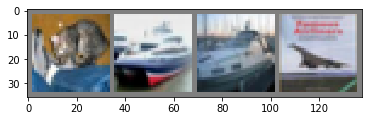

GroundTruth:    cat  ship  ship plane


In [18]:
# Display images from test set

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
outputs = net(images)
# torch.max(input, dim) returns the  max values along dimension dim 
# Output is [values, indices]
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   frog  ship  ship  ship


In [20]:
# Calculate the accuracy on the test set
correct = 0
total = 0

# Don't calculate grad because we're not training
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %
